In [8]:
import networkx as nx
import dgl
import torch as th
import matplotlib.pyplot as plt
from matplotlib import style

plt.style.use(['dark_background'])

# Graph creation

<br>
Is is possible to create a graph from networkx, and convert it into a DGLGraph and vice versa

## from networkx to dgl

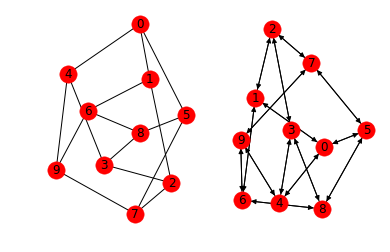

In [7]:
# use a pre-defined graph and convert it to dgl
g_nx = nx.petersen_graph()
g_dgl = dgl.DGLGraph(g_nx)

plt.subplot(121)
nx.draw(g_nx, with_labels=True)
plt.subplot(122)
nx.draw(g_dgl.to_networkx(), with_labels=True)

plt.show()

### They are the same graph, except that DGLGraph is always directional.

## from dgl to networkx

<br>
In DGL

*  **nodes** are consecutive range of integers between 0 and *number_of_nodes()* and can grow by calling *add_nodes*
*  **edges** are in order of their additions, with one extra feature of *edge broadcasting*

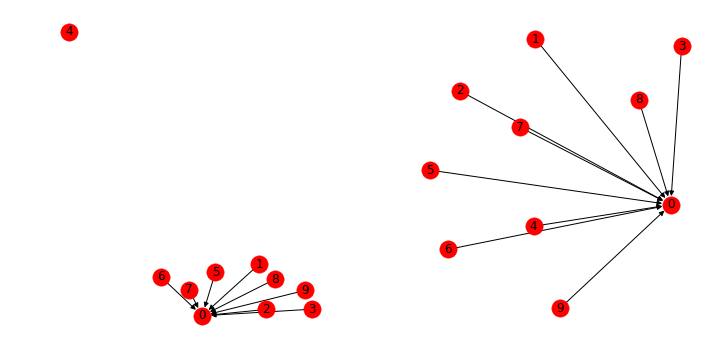

In [16]:
# init the graph
g = dgl.DGLGraph()
# add the firsr 10 nodes
g.add_nodes(10)

# edges can be added one-by-one 
for i in range(1, 4):
    g.add_edge(i, 0)
    
# or as an ordered list of source and destination
src = list(range(5, 8)); dst = [0]*3
g.add_edges(src, dst)

# but also with an ordered pair of tensors
src = th.tensor([8, 9]); dst = th.tensor([0, 0])
g.add_edges(src, dst)

# plot the first graph (4 is not linked to 0)
plt.figure(figsize=(12,6))
plt.subplot(121)
nx.draw(g.to_networkx(),with_labels=True)

# clear everything
g.clear()
g.add_nodes(10)
src = th.tensor(list(range(1, 10)));
# edge broadcasting will do star graph in one go!
g.add_edges(src, 0)

plt.subplot(122)
nx.draw(g.to_networkx(), with_labels=True)
plt.show()

# Feature Assignment

<br>

**nodes** and **edges** can be assigned features represented as a dictionary of *{"names": tensor}*, called *fields*

In [18]:
# Assign each of the 10 nodes a vector (len=3).
x = th.randn(10, 3)
g.ndata['x'] = x

### *ndata* is used to access the states of all *n*odes
### *edata* is used to access the features of all *e*dges
states are stored in a container data that hosts user defined dictionary.

In [29]:
print(g.ndata['x'] == g.nodes[:].data['x'])

# access node set with integer, list, or integer tensor
g.nodes[9].data['x'] = th.zeros(1, 3)
g.nodes[[0, 1, 2]].data['x'] = th.zeros(3, 3)
g.nodes[th.tensor([0, 1, 2])].data['x'] = th.zeros(3, 3)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.uint8)


In [30]:
g.edata['w'] = th.randn(9, 2)

# access edge set with IDs in integer, list, or integer tensor
g.edges[1].data['w'] = th.randn(1, 2)
g.edges[[0, 1, 2]].data['w'] = th.zeros(3, 2)
g.edges[th.tensor([0, 1, 2])].data['w'] = th.zeros(3, 2)

# one can also access the edges by giving endpoints
g.edges[1, 0].data['w'] = th.ones(1, 2)                 # edge 1 -> 0
g.edges[[1, 2, 3], [0, 0, 0]].data['w'] = th.ones(3, 2) # edges [1, 2, 3] -> 0

### After assignments, each node/edge field will be associated with a scheme containing the shape and data type (dtype) of its field value.

In [32]:
print("Nodes")
print(g.node_attr_schemes())
g.ndata['x'] = th.zeros((10, 4))
print(g.node_attr_schemes())
print("Edges")
print(g.edge_attr_schemes())

Nodes
{'x': Scheme(shape=(4,), dtype=torch.float32)}
{'x': Scheme(shape=(4,), dtype=torch.float32)}
Edges
{'w': Scheme(shape=(2,), dtype=torch.float32)}


In [34]:
# remove node/edge states from the graph
g.ndata.pop('x')
g.edata.pop('w')

tensor([[ 1.0000,  1.0000],
        [ 1.0000,  1.0000],
        [ 1.0000,  1.0000],
        [ 1.2360,  0.8712],
        [ 1.4320, -2.5533],
        [ 0.7539, -0.1473],
        [ 1.2683,  0.2083],
        [-1.1786,  1.4198],
        [-0.2578, -0.8853]])

# Multi-graph

<br>
Many graph applications need multi-edges, e.g social network with friends relations and diffusion network of tweets

In [46]:
# To enable multi-edges construct DGLGraph with multigraph=True
g_multi = dgl.DGLGraph(multigraph=True)
g_multi.add_nodes(10)
g_multi.ndata['x'] = th.randn(10, 2)

g_multi.add_edges(list(range(1, 10)), 0)
g_multi.add_edge(1, 0) # two edges on 1->0

g_multi.edata['w'] = th.randn(10, 2)
g_multi.edges[1].data['w'] = th.zeros(1, 2) # edge[1] features <- [0,0]
print(g_multi.edges()); print(g_multi.edata['w'])

(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 1]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
tensor([[-0.6907, -1.2757],
        [ 0.0000,  0.0000],
        [ 0.1270, -0.3943],
        [-1.2458,  0.8694],
        [-0.3331,  0.4656],
        [-0.6005,  1.3131],
        [ 0.7767,  0.3316],
        [-0.0483,  1.9036],
        [-0.2065, -0.0418],
        [ 2.0853, -1.3554]])
